# Task 1 (5 points)

Given a system:

<!-- A = 
    [0 0 1 0;
     0 0 0 1;
     n -2 -10/n -2;
     -5 -n/10 0 -3]; -->

$$ 
\begin{cases}
\dot x = 
\begin{bmatrix} 
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
 n & -2 & -10/n & -2 \\
-5 & -n/10 & 0 & -3
\end{bmatrix}
x
+ 
\begin{bmatrix} 
0 \\
0 \\
-1\\
1
\end{bmatrix}
u \\
y = \begin{bmatrix} 
1 & 1 & 0 & 0
\end{bmatrix} x
\end{cases}
$$

where $n$ is your number in your group list (ask your TA to give you your number if you don't have one).



1.   Find its transfer function representation ($y(s) / u(s) = W(s)$).
1.   Propose an ODE representation of the system.
1.   Propose a controller (control law $u = -Kx$) that makes the system stable. Do it via pole placement and as an LQR. For LQR show the cost function you chose.
1.   Show stability of the closed-loop system via eigenvalue analysis.
1.   Find stability margins by analysing Bode diagram for the system.
1.   Simulate closed-loop system.
1.   Modify the control law in such a way that the state of the system converges to $x_0 = \begin{bmatrix} 
(2+0.1n)/(n-5) \\
1 \\
0 \\
0 
\end{bmatrix}$. Show resulting control law. Simulate the system and demostrate convergence via graphs of state dynamics and error dynamics.
1. Discretize the system with $\Delta t = 0.01$. Write equations of the discrete dinamics.
1. Propose a control law for the discrete system via pole-placement and LQR (show cost function for the LQR).
1. Show eigenvalue analisys of the slosed-loop dynamics of the discrete system (with the proposed discrete control law. Demonstrate stability.
1. Simulate the discrete system. Show graphs.
1. Find Lyapunov function that proves the system's stability (one for continious time and one discrete time versions).






My number in group list is 13.

## Subtask 1:
To solve this problem, we turn to the formula for the transition from the state space to the representation of the transfer function:
$$
\begin{cases}
\dot x = Ax+Bu \\
y = Cx+Du
\end{cases} ⇔ 
\begin{cases}
sIx-Ax=Bu \\
y = Cx+Du
\end{cases} ⇔ 
\begin{cases}
x = (sI-A)^{-1}Bu \\
y = (C(sI-A)^{-1}B+D)u
\end{cases}
$$
In order to find transfer function representation in form ($y(s) / u(s) = W(s)$), we would just calculate $(C(sI-A)^{-1}B+D)$

First, let's find $sI-A$:
$$sI-A=\begin{pmatrix}s&0&-1&0\\ \:0\:&s&0&-1\\ \:\:-13&2&s+\frac{10}{13}&2\\ \:5\:&\frac{13}{10}&0&s+3\end{pmatrix} 
$$ 

Then let's find its determinant:
$$
\det \begin{pmatrix}s&0&-1&0\\ \:0\:&s&0&-1\\ \:\:-13&2&s+\frac{10}{13}&2\\ \:5\:&\frac{13}{10}&0&s+3\end{pmatrix}= \frac{130s^4+490s^3-1221s^2-6240s-3497}{130} $$

Now, let's calculate inverse matrix of $sI-A$:
$$
(sI-A)^{-1}= \\ =\frac{1}{130s^4+490s^3-1221s^2-6240s-3497}\begin{pmatrix}{130s^3+490s^2+469s+130}&-{26\left(10s+17\right)}&{13\left(10s^2+30s+13\right)}&-{260\left(s+1\right)}\\ -{50\left(13s+10\right)}&-{10\left(-13s^3-49s^2+139s+637\right)}&-{650}&{10\left(13s^2+10s-169\right)}\\ {13\left(130s^2+490s+269\right)}&-{26s\left(10s+17\right)}&{13s\left(10s^2+30s+13\right)}&-{260s\left(s+1\right)}\\ -{50s\left(13s+10\right)}&-{13\left(13s^2+10s-269\right)}&-{650s}&{10s\left(13s^2+10s-169\right)}\end{pmatrix}
$$

Let's multiply matrix $C$ on matrix $(sI-A)^{-1}$:
$$
C(sI-A)^{-1}= \\ =\frac{1}{130s^4+490s^3-1221s^2-6240s-3497}\begin{pmatrix}130s^3+490s^2-181s-370&130s^3+490s^2-1650s-6812&130s^2+390s-481&130s^2-160s-1950\end{pmatrix}
$$

Finaly let's multiply previous result on matrix $B$:
$$
C(sI-A)^{-1}B= \frac{-550s-1469}{130s^4+490s^3-1221s^2-6240s-3497}
$$

Since matrix $D$ is null matrix, our answer would be:
$$
W(s)= \frac{-550s-1469}{130s^4+490s^3-1221s^2-6240s-3497}
$$

## Subtask 2
Let's formulate the system of 4 first-order linear eq. as a system of 2 second-order linear equations:
$$
x=\begin{bmatrix} 
x_1 \\
x_2 \\
x_3\\
x_4
\end{bmatrix} ⇔\dot x=\begin{bmatrix} 
\dot x_1 \\
\dot x_2 \\
\dot x_3\\
\dot x_4
\end{bmatrix}
$$
From equation $\dot x =Ax+Bu$ we can derive following system: 
$$
\begin{cases}
\dot x_1 = x_3\\
\dot x_2 = x_4\\
\dot x_3 = 13x_1-2x_2-\frac{10}{13}x_3-2x_4 -u \\
\dot x_4 = -5x_1-\frac{13}{10}x_2-3x_4 +u
\end{cases} ⇔
\begin{cases}
\ddot x_1 = 13x_1-2x_2-\frac{10}{13}\dot x_1-2\dot x_2 -u\\
\ddot x_2 = -5x_1-\frac{13}{10}x_2-3\dot x_2  +u
\end{cases} 
$$

## Subtask 3


Using pole placement:

Eigen values before pole placement:
[ 3.49123438+0.j         -3.29699979+0.83114173j -3.29699979-0.83114173j
 -0.66646556+0.j        ]
Required control law constants:
[[-19.40914323   1.64377158  -4.38371664   1.84705259]]

Eigen values after pole placement:
[-1. -2. -4. -3.]


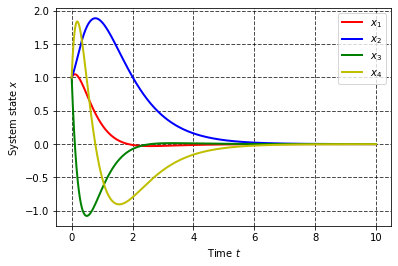

In [ ]:
from scipy.signal import place_poles
import numpy as np
from scipy.integrate import odeint
from matplotlib.pyplot import *

def control(x, K):
  u = -np.dot(K,x)
  return u

def system_ode(x, t, A, B, K):
    u = control(x,K)
    dx = np.dot(A,x) + np.dot(B,u)
    return dx

t0 = 0 # Initial time 
tf = 10 # Final time
N = int(2E3) # Numbers of points in time span
t = np.linspace(t0, tf, N) # Create time span
x0= np.array([1,1,1,1])
A = [[0, 0, 1, 0],
    [0, 0, 0, 1],
    [13, -2, -10/13, -2],
    [-5, -13/10, 0, -3]]

B = [[0],
     [0],
     [-1],
     [1]]

P = [-4, -3, -2, -1]


pp =place_poles(np.array(A), np.array(B), np.array(P))

q,w = np.linalg.eig(A)
print (f"Eigen values before pole placement:\n{q}")

K = pp.gain_matrix
print(f"Required control law constants:\n{K}\n")

Lambda, Q = np.linalg.eig(A-np.dot(B, K))
print(f"Eigen values after pole placement:\n{Lambda}")

x_sol = odeint(system_ode, x0, t, args=(np.array(A), np.array(B), np.array(K)))

plot(t, x_sol[:,0], 'r', linewidth = 2., label = r'$x_1$')
plot(t, x_sol[:,1], 'b', linewidth = 2., label = r'$x_2$')
plot(t, x_sol[:,2], 'g', linewidth = 2., label = r'$x_3$')
plot(t, x_sol[:,3], 'y', linewidth = 2., label = r'$x_4$')
legend()
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
ylabel(r'System state $x$')
xlabel(r'Time $t$')
show()

From that we can propose our control law as $u=-\begin{pmatrix}-19.40914323 &  1.64377158 & -4.38371664 &  1.84705259\end{pmatrix}x$ which makes our system stable.

Using LQR:

P:
 [[70.37286795 -6.29066301 16.46136144 -5.54986377]
 [-6.29066301  1.89328844 -1.43251756  0.75239505]
 [16.46136144 -1.43251756  3.99354964 -1.27701014]
 [-5.54986377  0.75239505 -1.27701014  0.64994546]]
Required control law constants:
 [[-22.01122521   2.18491261  -5.27055978   1.9269556 ]]
Eigen values after LQR:
[-0.68249493+0.j         -3.57503552+0.65533453j -3.57503552-0.65533453j
 -3.13418017+0.j        ]


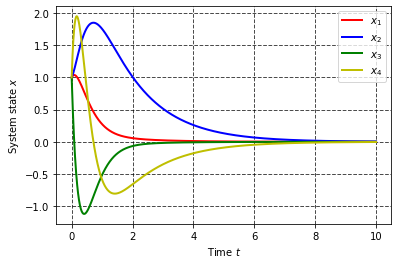

In [ ]:
from matplotlib.pyplot import *
from scipy.integrate import odeint
from scipy.signal import place_poles
import numpy as np

def control(x, K):
  u = -np.dot(K,x)
  return u

def system_ode(x, t, A, B, K):
    u = control(x,K)
    dx = np.dot(A,x) + np.dot(B,u)
    return dx

t0 = 0 # Initial time 
tf = 10 # Final time
N = int(2E3) # Numbers of points in time span
t = np.linspace(t0, tf, N) # Create time span
x0= np.array([1,1,1,1])

A = np.array([[0, 0, 1, 0],
              [0, 0, 0, 1],
              [13, -2, -10/13, -2],
              [-5, -13/10, 0, -3]])
B = np.array([[0],
              [0],
              [-1],
              [1]])
Q = np.eye(4)
R = np.array([[1]])

from scipy.linalg import solve_continuous_are
P = solve_continuous_are(A,B,Q,R)
print("P:\n",P)

K = np.dot(np.dot(np.linalg.inv(R), np.transpose(B)),P)
print("Required control law constants:\n",K)

Lambda, Q = np.linalg.eig(A-np.dot(B, K))
print(f"Eigen values after LQR:\n{Lambda}")

x_sol = odeint(system_ode, x0, t, args=(A, B, K))

plot(t, x_sol[:,0], 'r', linewidth = 2., label = r'$x_1$')
plot(t, x_sol[:,1], 'b', linewidth = 2., label = r'$x_2$')
plot(t, x_sol[:,2], 'g', linewidth = 2., label = r'$x_3$')
plot(t, x_sol[:,3], 'y', linewidth = 2., label = r'$x_4$')
legend()
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
ylabel(r'System state $x$')
xlabel(r'Time $t$')
show()

From that we can propose our control law as $u=-\begin{pmatrix}-22.01122521 &  2.18491261 & -5.27055978  & 1.9269556\end{pmatrix}x$ which makes our system stable.
Quadratic cost function for LQR would be:
$$
x^T \begin{bmatrix} 
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 
\end{bmatrix}x + u^T \begin{bmatrix} 1 \end{bmatrix}u
$$


## Subtask 4
See previous

## Subtask 5

/usr/local/lib/python3.7/dist-packages/scipy/signal/filter_design.py:1622: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


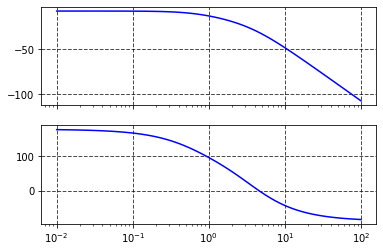

Magtnitude:  -7.962157407361592


In [ ]:
import numpy as np
from matplotlib.pyplot import *
from scipy.integrate import odeint
from scipy.signal.ltisys import TransferFunction
from scipy.signal import ss2tf
from scipy.linalg import solve_continuous_are

A = np.array([[0, 0, 1, 0],
              [0, 0, 0, 1],
              [13, -2, -10/13, -2],
              [-5, -13/10, 0, -3]])
B = np.array([[0],
              [0],
              [-1],
              [1]])

C = np.array([[1,1,0,0]])

D = np.array([[0]])
Q = np.eye(4)
R = np.array([[1]])


P = solve_continuous_are(A,B,Q,R)

K = np.dot(np.dot(np.linalg.inv(R), np.transpose(B)),P)

G = ss2tf(A-B.dot(K), B, C, D)
sys = TransferFunction(G[0], G[1])

w, mag, phase = sys.bode()

f, (ax1, ax2) = subplots(2, 1, sharex=True)
ax1.semilogx(w, mag, color="blue")    # Bode magnitude plot
ax1.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
ax1.grid(True)

ax2.semilogx(w, phase, color="blue")  # Bode phase plot
ax2.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
ax2.grid(True)
show()

magnitude_val = 0
phase_val = 0

for i in range(len(w)):
  if (abs(phase[i]-180) < abs(phase_val-180)):
    magnitude_val = mag[i]
    phase_val = phase[i]

print('Magtnitude: ',magnitude_val)

Since magnitude plot doesn't intersect 0 we can say that Phase Margin is equal to infinity.

Gain margin would be ≈ 7.962157407361592.

Stability criterias are the following:
- For a Stable System: Both the margins should be positive or phase margin should be greater than the gain margin.
- For Marginal Stable System: Both the margins should be zero or phase margin should be equal to the gain margin.
- For Unstable System: If any of them is negative or phase margin should be less than the gain margin.

Since the phase margin is greater than the gain margin, we can conclude that our system is stable.

## Subtask 6


System without control diverges (unstable):

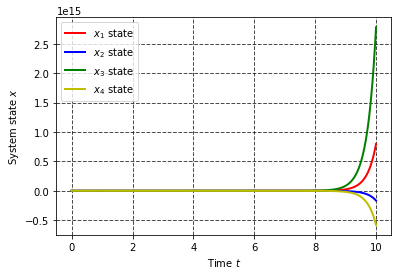

In [ ]:
from matplotlib.pyplot import *
from scipy.integrate import odeint
from scipy.signal import place_poles
import numpy as np

def control(x, K):
  u = -np.dot(K,x)
  return u

def system_ode(x, t, A, B, K):
    u = control(x,K)
    dx = np.dot(A,x) + np.dot(B,u)
    return dx

def print_sim(x_sol):
    plot(t, x_sol[:,0], 'r', linewidth = 2., label = r'$x_1$ state')
    plot(t, x_sol[:,1], 'b', linewidth = 2., label = r'$x_2$ state')
    plot(t, x_sol[:,2], 'g', linewidth = 2., label = r'$x_3$ state')
    plot(t, x_sol[:,3], 'y', linewidth = 2., label = r'$x_4$ state')
    legend()
    grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
    grid(True)
    ylabel(r'System state $x$')
    xlabel(r'Time $t$')
    show()

t0 = 0 # Initial time 
tf = 10 # Final time
N = int(2E3) # Numbers of points in time span
t = np.linspace(t0, tf, N) # Create time span
x0= np.array([1,1,1,1])

A = np.array([[0, 0, 1, 0],
              [0, 0, 0, 1],
              [13, -2, -10/13, -2],
              [-5, -13/10, 0, -3]])
B = np.array([[0],
              [0],
              [-1],
              [1]])
Q = np.eye(4)
R = np.array([[1]])
K = np.array([[0,0,0,0]])

x_sol = odeint(system_ode, x0, t, args=(A, B, K))
print_sim(x_sol)



When we use LQR system converges (stable):

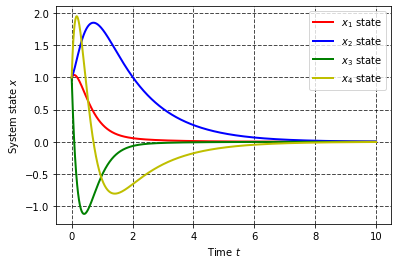

In [ ]:
from scipy.linalg import solve_continuous_are
P = solve_continuous_are(A,B,Q,R)

K = np.dot(np.dot(np.linalg.inv(R), np.transpose(B)),P)

x_sol = odeint(system_ode, x0, t, args=(A, B, K))
print_sim(x_sol)

When we use pole placement system converges (stable):

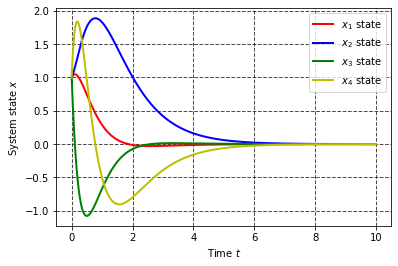

In [ ]:
P = [-4, -3, -2, -1]


pp =place_poles(A, B, np.array(P))

K = pp.gain_matrix
x_sol = odeint(system_ode, x0, t, args=(A, B, K))
print_sim(x_sol)

## Subtask 7
$$
x^{*}=x_{des} =
\begin{bmatrix}
\frac{2+0.1*13}{13-5} \\
1 \\
0 \\
0
\end{bmatrix}=
\begin{bmatrix}
0.4125 \\
1 \\
0 \\
0
\end{bmatrix}
$$
New control law will be through error dynamics: \\

$$
\begin{cases}
u = -K(x-x^{*}) + u^{*} \\
u^{*} = B^{+}(\dot x^{*} - Ax^{*})
\end{cases}
\iff
u = -K(x-x^{*}) + B^{+}(\dot x^{*} - Ax^{*})
$$

Let's use K from Pole placement method in order to make our system stable:

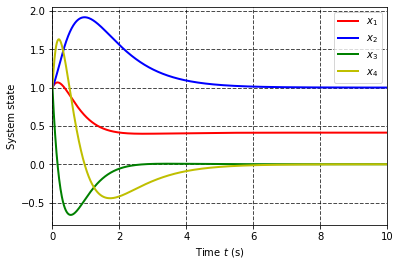

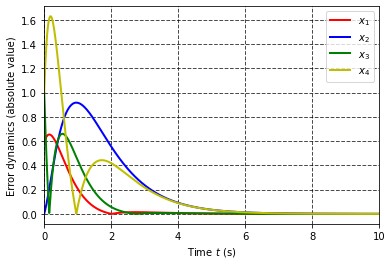

In [ ]:
from matplotlib.pyplot import *
from scipy.integrate import odeint
from scipy.signal import place_poles
import numpy as np

def StateSpace(x, t, A, B, K, x_des, dx_des):
  u_ff = np.linalg.pinv(B) @ (dx_des - A @ x_des)
  u_fb = - K @ (x-x_des) 
  u = u_fb + u_ff
  return A @ x + B @ u

t0 = 0
tf = 10
t = np.linspace(t0, tf, 1000)

A = np.array([[0, 0, 1, 0],
              [0, 0, 0, 1],
              [13, -2, -10/13, -2],
              [-5, -13/10, 0, -3]])

B = np.array([[0],
              [0],
              [-1],
              [1]])

P = [-4, -3, -2, -1]


pp =place_poles(A, B, np.array(P))

K = pp.gain_matrix

x_des = np.array([0.4125, 1, 0, 0])
dx_des = np.array([0, 0, 0, 0])
x0 = np.array([1, 1, 1, 1])

x_sol = odeint(StateSpace, x0, t, args=(A, B, K, x_des, dx_des))


plot(t, x_sol[:,0], 'r', linewidth = 2., label = r'$x_1$')
plot(t, x_sol[:,1], 'b', linewidth = 2., label = r'$x_2$')
plot(t, x_sol[:,2], 'g', linewidth = 2., label = r'$x_3$')
plot(t, x_sol[:,3], 'y', linewidth = 2., label = r'$x_4$')
legend()
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'System state')
xlabel(r'Time $t$ (s)')
show()

plot(t, abs(x_des[0]-x_sol[:,0]), 'r', linewidth = 2., label = r'$x_1$')
plot(t, abs(x_des[1]-x_sol[:,1]), 'b', linewidth = 2., label = r'$x_2$')
plot(t, abs(x_des[2]-x_sol[:,2]), 'g', linewidth = 2., label = r'$x_3$')
plot(t, abs(x_des[3]-x_sol[:,3]), 'y', linewidth = 2., label = r'$x_4$')
legend()
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'Error dynamics (absolute value)')
xlabel(r'Time $t$ (s)')
show()


## Subtask 8
Let's discretize our system with $Δt=0.01$
$$
\begin{equation}
\begin{cases} 
\mathbf{x} [(k+1)Δt] = \mathbf{A_dx} [kΔt] + \mathbf{B_du} [kΔt]\\
\mathbf{y} [kΔt] = \mathbf{C_dx} [kΔt] + \mathbf{D_du} [kΔt]
\end{cases} 
\end{equation}
$$
where
*   $\mathbf{x} [(k+1)Δt]$ - system state vector in the future
*   $\mathbf{x} [kΔt]$ - current system state vector
*   $\mathbf{y} [kΔt]$ - current output vector
*   $\mathbf{u} [kΔt]$ - control inputs
*   $\mathbf{A_d}$ - discrete state matrix
*   $\mathbf{B_d}$ - discrete input matrix
*   $\mathbf{C_d}$ - discrete output matrix
*   $\mathbf{D_d}$ - discrete feedforward matrix

Since we are inrested only in discretization of $A,B$ and $C$ matrices from our system, let's apply folowing calculation method:
$$
\mathbf{A_d} = \mathbf{A}Δt+\mathbf{I} \\
\mathbf{B_d} = \mathbf{B}Δt \\
\mathbf{C_d} = \mathbf{C}
$$
Therefore our descritized system with $Δt=0.01$ would be:
$$ 
\begin{cases}
x_{i+1} = 
\begin{bmatrix} 
1 & 0 & 0.01 & 0 \\
0 & 1 & 0 & 0.01 \\
 0.13 & -0.02 & 1-1/130 & -0.2 \\
-0.05 & -0.013 & 0 & 0.97
\end{bmatrix}
x_i
+ 
\begin{bmatrix} 
0 \\
0 \\
-0.01\\
0.01
\end{bmatrix}
u \\
y_i = \begin{bmatrix} 
1 & 1 & 0 & 0
\end{bmatrix} x_i
\end{cases}
$$

## Subtask 9
Let's check eigenvalues of our discretized system without control:

In [ ]:
dT = 0.01
A = np.array([[0, 0, 1, 0],
              [0, 0, 0, 1],
              [13, -2, -10/13, -2],
              [-5, -13/10, 0, -3]])
B = np.array([[0],
              [0],
              [-1],
              [1]])

C = np.array([[1,1,0,0]])

A_d = A*dT + np.eye(4)
B_d = B*dT
C_d = C

K=np.array([[0,0,0,0]])

Lambda, Q = np.linalg.eig(A_d-np.dot(B_d, K))
print(f"Eigen values for system without control:\n{Lambda}")

Eigen values for system without control:
[1.03491234+0.j         0.96703   +0.00831142j 0.96703   -0.00831142j
 0.99333534+0.j        ]


Since one of the eigenvalues is more than one, then by applying stability criteria $|\lambda_i| = \sqrt{\operatorname{Re}(\lambda_i)^2 + \operatorname{Im}(\lambda_i)^2} < 1,\forall i$ we can say that our system is unstable.

Let's stabilize it via **Pole placement**:

In [ ]:
P = np.array([-0.4,-0.3,-0.2,-0.1])
pp = place_poles(A_d, B_d, P)
K = pp.gain_matrix
print(f"Required control law constants:\n{K}\n")

Lambda, Q = np.linalg.eig(A_d-np.dot(B_d, K))
print(f"Eigen values for system with control:\n{Lambda}")


Required control law constants:
[[ 32112235.98351623 -43276298.54215785 -17841120.15605037
  -17840623.92528998]]

Eigen values for system with control:
[-0.38953877 -0.32324708 -0.17915531 -0.10805875]


From that we can propose our control law as $u=-\begin{pmatrix}32112235.98351623 & -43276298.54215785 & -17841120.15605037 &
  -17840623.92528998\end{pmatrix}x$ which makes our system stable.

Let's stabilize our system via **LQR**:

In [ ]:
from scipy.linalg import solve_discrete_are

Q_d = np.eye(4)
R_d = np.array([[1]])

S_d = solve_discrete_are(A_d,B_d,Q_d,R_d) # solution of LQR

K = np.dot(np.dot(np.linalg.inv(R_d), np.transpose(B_d)),S_d) # K's for control law
print("Required control law constants:\n",K)

Lambda, Q = np.linalg.eig(A_d-np.dot(B_d, K))
print(f"Eigen values for system with control:\n{Lambda}")

Required control law constants:
 [[-22.42067746   2.22652191  -5.37244908   1.96477154]]
Eigen values for system with control:
[0.99317826+0.j         0.96427851+0.00569149j 0.96427851-0.00569149j
 0.96720021+0.j        ]


From that we can propose our control law as $u=-\begin{pmatrix}-22.42067746  & 2.22652191 &  -5.37244908  & 1.96477154\end{pmatrix}x$ which makes our system stable.

Cost function for LQR would be:
$$
x^T \begin{bmatrix} 
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 
\end{bmatrix}x + u^T \begin{bmatrix} 1 \end{bmatrix}u
$$

## Subtask 10
Stability criterias are the following:


*   Asymptotically stable $|\lambda_i| = \sqrt{\operatorname{Re}(\lambda_i)^2 + \operatorname{Im}(\lambda_i)^2} < 1,\forall i$ 
*   Lyapunov stable: $ |\lambda_i|\leq 1,\forall i$
*   Unstable: $\exists\lambda_i, |\lambda_i|>1 $

We can say that our system after applying LQR or Pole placement becames stable.

## Subtask 11
Stabilization of descrite via Pole Placement:

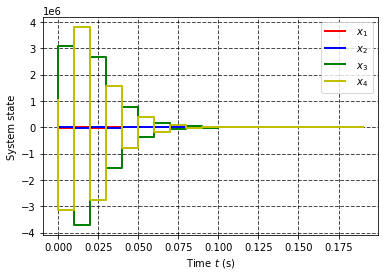

In [ ]:
from scipy.signal import place_poles

dT = 0.01

A = np.array([[0, 0, 1, 0],
              [0, 0, 0, 1],
              [13, -2, -10/13, -2],
              [-5, -13/10, 0, -3]])

B = np.array([[0],
              [0],
              [-1],
              [1]])

K=np.array([[0,0,0,0]])

x0 = np.array([3,3,2,2])  # initial state

t0=0
tf=0.2
t = np.arange(t0, tf, dT)

A_d = np.eye(4) + dT*A
B_d = dT*B

P = np.array([-0.4,-0.3,-0.2,-0.1])
pp = place_poles(A_d, B_d, P)
K = pp.gain_matrix

x_d = x0
x_disc = x0

for time in t:
  u_d = - np.dot(K,x_d)  
  x_d = np.dot(A_d,x_d) + np.dot(B_d,u_d)
  x_disc = np.vstack((x_disc, x_d))

t_disc = np.insert(t, 0, 0)


step(t_disc, x_disc[:,0], 'r', linewidth=2.0, label = r' $x_1$')
step(t_disc, x_disc[:,1], 'b', linewidth=2.0, label = r' $x_2$ ')
step(t_disc, x_disc[:,2], 'g', linewidth=2.0, label = r' $x_3$')
step(t_disc, x_disc[:,3], 'y', linewidth=2.0, label = r' $x_4$ ')
legend()
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
ylabel(r'System state')
xlabel(r'Time $t$ (s)')
show()


Stabilization of descrite via LQR:

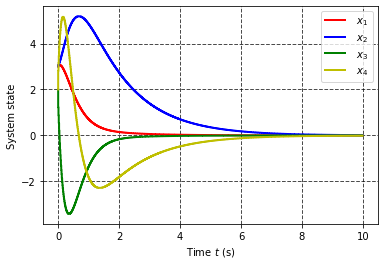

In [ ]:
dT = 0.01

A = np.array([[0, 0, 1, 0],
              [0, 0, 0, 1],
              [13, -2, -10/13, -2],
              [-5, -13/10, 0, -3]])

B = np.array([[0],
              [0],
              [-1],
              [1]])

K=np.array([[0,0,0,0]])

x0 = np.array([3,3,2,2])  # initial state

t0=0
tf=10
t = np.arange(t0, tf, dT)

A_d = np.eye(4) + dT*A
B_d = dT*B

Q_d = np.eye(4)
R_d = np.array([[1]])

S_d = solve_discrete_are(A_d,B_d,Q_d,R_d) # solution of LQR

K = np.dot(np.dot(np.linalg.inv(R_d), np.transpose(B_d)),S_d) # K's for control law

x_d = x0
x_disc = x0

for time in t:
  u_d = - np.dot(K,x_d)  
  x_d = np.dot(A_d,x_d) + np.dot(B_d,u_d)
  x_disc = np.vstack((x_disc, x_d))

y_disc, dy_disc = x_disc[:,0], x_disc[:,2] 
t_disc = np.insert(t, 0, 0)


step(t_disc, x_disc[:,0], 'r', linewidth=2.0, label = r' $x_1$')
step(t_disc, x_disc[:,1], 'b', linewidth=2.0, label = r' $x_2$ ')
step(t_disc, x_disc[:,2], 'g', linewidth=2.0, label = r' $x_3$')
step(t_disc, x_disc[:,3], 'y', linewidth=2.0, label = r' $x_4$ ')
legend()
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
ylabel(r'System state')
xlabel(r'Time $t$ (s)')
show()


## Subtask 12
For linear system $\dot x=Ax$, Lyapunov function candidate may exist only if system is stable, since it's defined as:
$$
V=x^TSx \text{, where S is positive semidefinite matrix}
$$
We can calculate matrix $S$ from equation:
$$
A^TS+SA=-Q \text{, where Q is positive definite matrix}
$$
If we have a matrix $S$ that is not positive semi-finite, then we can conclude that the system is unstable, and vice versa, if the matrix $S$ is positive semi-finite, then we can conclude that the system is stable.

Let's check continous system:

In [ ]:
from scipy.linalg import solve_continuous_lyapunov
from numpy.linalg import eig

Q_c = np.eye(4)

Q = np.eye(4)
R = np.array([[1]])

P = solve_continuous_are(A,B,Q,R)

K = np.dot(np.dot(np.linalg.inv(R), np.transpose(B)),P)

S_c = solve_continuous_lyapunov(A-B.dot(K), -Q_c)

np.all(np.linalg.eigvals(S_c) > 0)

True

Let's check descrete system:

In [ ]:
from scipy.linalg import solve_discrete_lyapunov

Q_d = np.eye(4)

Q = np.eye(4)
R = np.array([[1]])

Sd = solve_discrete_are(A_d,B_d,Q,R) # solution of LQR

K = np.dot(np.dot(np.linalg.inv(R_d), np.transpose(B_d)),Sd) # K's for control law

S_d = solve_discrete_lyapunov(A_d-B_d.dot(K), Q_d)

np.all(np.linalg.eigvals(S_d) > 0)

True

# Task 2 (4 points)

You are given a system:

$$ 
\begin{cases}
\dot x = 
\begin{bmatrix} 
1 & 5 & -2 \\
2 & 1 & -3 \\
-1 & -2 & 7
\end{bmatrix}
x
+ 
\begin{bmatrix} 
2 \\
1 \\
0
\end{bmatrix}
u \\
u = -\begin{bmatrix} 
7k & 6k & -50k
\end{bmatrix} x
\end{cases}
$$

1. How do the eigenvalues of the closed-loop system depend on k? Plot the evolution of the eigenvalues on a complex plane, as $k$ changes from 0 to 5. 
1. Chose a value of $k$ that allows the system to be stable. USe bode plot to find stability margins of teh closed-loop system.
1. Discretize the closed-loop system with $\Delta t = 0.05$ and simulate both the continues-time and discrete-time versions, show if there is a difference between simulation results.
1. What is the smallest value of $k$ that makes the eigenvalues purely real?

## Subtask 1


In [ ]:
from matplotlib.pyplot import *
from scipy.integrate import odeint
from scipy.signal import place_poles
import numpy as np
import sympy 

k=sympy.symbols('k')

A = sympy.Matrix([[1, 5, -2],
             [2, 1, -3],
             [-1, -2, 7]])

B = sympy.Matrix([[2],
              [1],
              [0]])

K = sympy.Matrix([[7*k, 6*k, -50*k]])

A_under_control = A+B*(-K)
Lambdas = A_under_control.eigenvals(simplify=True, multiple=True)
print("First eigenvalue fomula:")
Lambdas[0]

First eigenvalue fomula:


(-400*2**(1/3)*k**2/3 - 20*k*(16000*k**3 - 39420*k**2 + 22194*k + 3*sqrt(3)*sqrt(719600*k**4 - 2248644*k**3 + 720108*k**2 + 1699380*k - 101925) - 405)**(1/3)/3 + 219*2**(1/3)*k + 3*(16000*k**3 - 39420*k**2 + 22194*k + 3*sqrt(3)*sqrt(719600*k**4 - 2248644*k**3 + 720108*k**2 + 1699380*k - 101925) - 405)**(1/3) - (32000*k**3 - 78840*k**2 + 44388*k + 6*sqrt(3)*sqrt(719600*k**4 - 2248644*k**3 + 720108*k**2 + 1699380*k - 101925) - 810)**(2/3)/6 - 30*2**(1/3))/(16000*k**3 - 39420*k**2 + 22194*k + 3*sqrt(3)*sqrt(719600*k**4 - 2248644*k**3 + 720108*k**2 + 1699380*k - 101925) - 405)**(1/3)

In [ ]:
print("Second eigenvalue fomula:")
Lambdas[1]

Second eigenvalue fomula:


(8*2**(1/3)*(-297*k + (20*k - 9)**2 + 9) + (1 + sqrt(3)*I)*(-80*k + 2**(2/3)*(1 + sqrt(3)*I)*(3915*k + 2*(20*k - 9)**3 - 27*(20*k - 9)*(33*k - 1) + sqrt(-4*(-297*k + (20*k - 9)**2 + 9)**3 + (3915*k + 2*(20*k - 9)**3 - 27*(20*k - 9)*(33*k - 1) + 1296)**2) + 1296)**(1/3) + 36)*(3915*k + 2*(20*k - 9)**3 - 27*(20*k - 9)*(33*k - 1) + sqrt(-4*(-297*k + (20*k - 9)**2 + 9)**3 + (3915*k + 2*(20*k - 9)**3 - 27*(20*k - 9)*(33*k - 1) + 1296)**2) + 1296)**(1/3))/(12*(1 + sqrt(3)*I)*(3915*k + 2*(20*k - 9)**3 - 27*(20*k - 9)*(33*k - 1) + sqrt(-4*(-297*k + (20*k - 9)**2 + 9)**3 + (3915*k + 2*(20*k - 9)**3 - 27*(20*k - 9)*(33*k - 1) + 1296)**2) + 1296)**(1/3))

In [ ]:
print("Third eigenvalue fomula:")
Lambdas[2]

Third eigenvalue fomula:


(8*2**(1/3)*(-297*k + (20*k - 9)**2 + 9) + (1 - sqrt(3)*I)*(-80*k + 2**(2/3)*(1 - sqrt(3)*I)*(3915*k + 2*(20*k - 9)**3 - 27*(20*k - 9)*(33*k - 1) + sqrt(-4*(-297*k + (20*k - 9)**2 + 9)**3 + (3915*k + 2*(20*k - 9)**3 - 27*(20*k - 9)*(33*k - 1) + 1296)**2) + 1296)**(1/3) + 36)*(3915*k + 2*(20*k - 9)**3 - 27*(20*k - 9)*(33*k - 1) + sqrt(-4*(-297*k + (20*k - 9)**2 + 9)**3 + (3915*k + 2*(20*k - 9)**3 - 27*(20*k - 9)*(33*k - 1) + 1296)**2) + 1296)**(1/3))/(12*(1 - sqrt(3)*I)*(3915*k + 2*(20*k - 9)**3 - 27*(20*k - 9)*(33*k - 1) + sqrt(-4*(-297*k + (20*k - 9)**2 + 9)**3 + (3915*k + 2*(20*k - 9)**3 - 27*(20*k - 9)*(33*k - 1) + 1296)**2) + 1296)**(1/3))

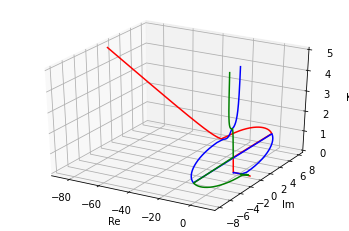

In [ ]:
from traitlets.traitlets import Int
from scipy.integrate import odeint
from scipy.signal import place_poles
import matplotlib.pyplot as plt
import numpy as np
import sympy 

A = np.array([[1, 5, -2],
             [2, 1, -3],
             [-1, -2, 7]])

B = np.array([[2],
              [1],
              [0]])

k_min=0
k_max=5
k_step=0.01
count = int(np.floor((k_max-k_min)/k_step))
count +=1
k_range = np.linspace(k_min, k_max, count)
E = np.zeros((count, 6))

for i in range(count):
    k = k_range[i]
    K = np.array([[7*k, 6*k, -50*k]])
    ei, v = np.linalg.eig((A - B.dot(K)))
    E[i, 0] = np.real(ei[0])
    E[i, 1] = np.imag(ei[0])
    E[i, 2] = np.real(ei[1])
    E[i, 3] = np.imag(ei[1])
    E[i, 4] = np.real(ei[2])
    E[i, 5] = np.imag(ei[2])


ax = plt.axes(projection='3d')
X = E[:, 0]
Y = E[:, 1]
Z = k_range
ax.plot3D(X,Y,Z,'r')
X = E[:, 2]
Y = E[:, 3]
Z = k_range
ax.plot3D(X,Y,Z,'b')
X = E[:, 4]
Y = E[:, 5]
Z = k_range
ax.plot3D(X,Y,Z,'g')
ax.set_xlabel('Re')
ax.set_ylabel('Im')
ax.set_zlabel('K')
plt.show()


def plot_graph(x, y, xLabel, yLabel, color):
  plot(x, y, color = color)
  xlabel(xLabel)
  ylabel(yLabel)
  ylim()
  grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
  grid(True)
  show()



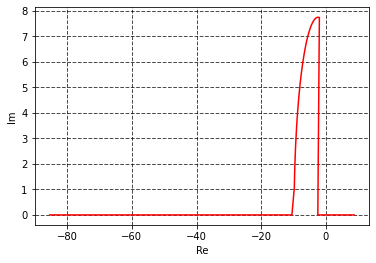

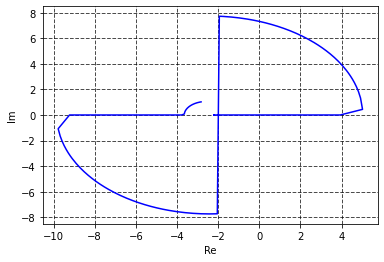

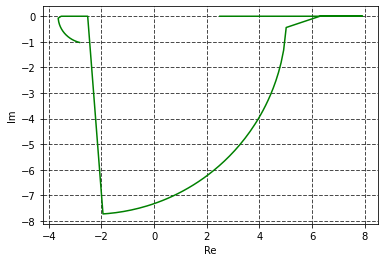

In [ ]:
plot_graph(E[:, 0], E[:, 1], 'Re', 'Im', 'r')
plot_graph(E[:, 2], E[:, 3],'Re', 'Im','b')
plot_graph(E[:, 4], E[:, 5],'Re', 'Im','g')

## Subtask 2
From the following tables we can say, that if $k=1$ then our system would be stable, since real parts of eigenvalues would be negative.

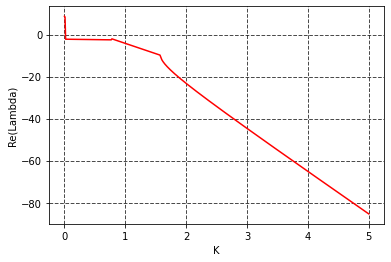

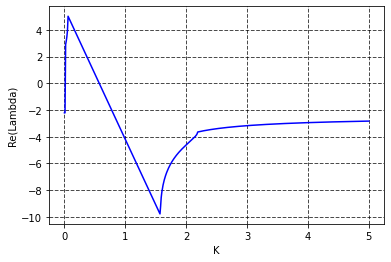

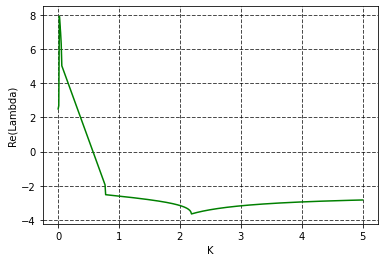

In [ ]:
plot_graph(k_range, E[:, 0], 'K', 'Re(Lambda)','r')
plot_graph(k_range,E[:, 2], 'K', 'Re(Lambda)','b')
plot_graph( k_range,E[:, 4], 'K', 'Re(Lambda)','g')

For this task let's assume that: $$y=\begin{bmatrix} 1 & 0 & 0 \end{bmatrix} $$
Also let's stabilize the system using $k=1$

/usr/local/lib/python3.7/dist-packages/scipy/signal/filter_design.py:1622: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


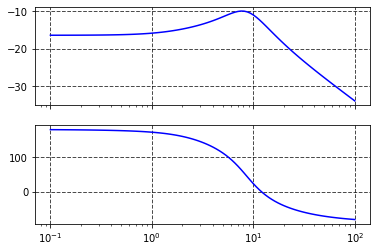

In [ ]:
import numpy as np
from matplotlib.pyplot import *
from scipy.integrate import odeint
from scipy.signal.ltisys import TransferFunction
from scipy.signal import ss2tf

A = np.array([[1, 5, -2],
             [2, 1, -3],
             [-1, -2, 7]])
B = np.array([[2],
              [1],
              [0]])

C = np.array([[1,0,0]])

D = np.array([[0]])
k=1
K = np.array([[7*k, 6*k, -50*k]])

G = ss2tf(A-B.dot(K), B, C, D)
sys = TransferFunction(G[0], G[1])

w, mag, phase = sys.bode()

f, (ax1, ax2) = subplots(2, 1, sharex=True)
ax1.semilogx(w, mag, color="blue")    # Bode magnitude plot
ax1.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
ax1.grid(True)

ax2.semilogx(w, phase, color="blue")  # Bode phase plot
ax2.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
ax2.grid(True)
show()

Since magnitude plot doesn't intersect 0 we can say that Phase Margin is equal to infinity.

In [ ]:
magnitude_val = 0
phase_val = 0

for i in range(len(w)):
  if (abs(phase[i]-180) < abs(phase_val-180)):
    magnitude_val = mag[i]
    phase_val = phase[i]

print('Magtnitude: ',magnitude_val)

Magtnitude:  -16.456752582226144


Gain margin would be ≈ 16.456752582226144.

Stability criterias are the following:
- For a Stable System: Both the margins should be positive or phase margin should be greater than the gain margin.
- For Marginal Stable System: Both the margins should be zero or phase margin should be equal to the gain margin.
- For Unstable System: If any of them is negative or phase margin should be less than the gain margin.

Since the phase margin is greater than the gain margin, we can conclude that our system is stable.

## Subtask 3
Continous system with $k=1$:

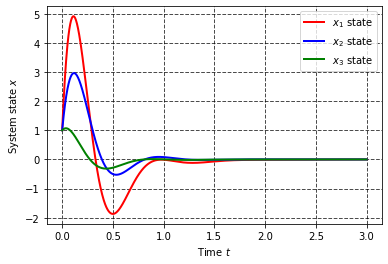

In [ ]:
from matplotlib.pyplot import *
from scipy.integrate import odeint
from scipy.signal import place_poles
import numpy as np

def control(x, K):
  u = -np.dot(K,x)
  return u

def system_ode(x, t, A, B, K):
    u = control(x,K)
    dx = np.dot(A,x) + np.dot(B,u)
    return dx

def print_sim(x_sol):
    plot(t, x_sol[:,0], 'r', linewidth = 2., label = r'$x_1$ state')
    plot(t, x_sol[:,1], 'b', linewidth = 2., label = r'$x_2$ state')
    plot(t, x_sol[:,2], 'g', linewidth = 2., label = r'$x_3$ state')
    legend()
    grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
    grid(True)
    ylabel(r'System state $x$')
    xlabel(r'Time $t$')
    show()

t0 = 0 # Initial time 
tf = 3 # Final time
N = int(2E3) # Numbers of points in time span
t = np.linspace(t0, tf, N) # Create time span
x0= np.array([1,1,1])

A = np.array([[1, 5, -2],
             [2, 1, -3],
             [-1, -2, 7]])
B = np.array([[2],
              [1],
              [0]])

K = np.array([[7,6,-50]])

x_sol = odeint(system_ode, x0, t, args=(A, B, K))
print_sim(x_sol)

Discrete system with Δt=0.05

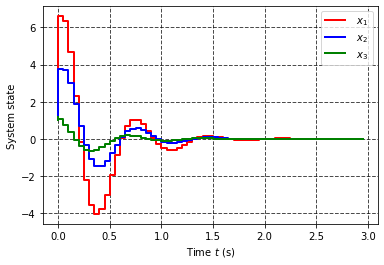

In [ ]:
from scipy.signal import place_poles

T = 0.05

A = np.array([[1, 5, -2],
             [2, 1, -3],
             [-1, -2, 7]])
B = np.array([[2],
              [1],
              [0]])

K = np.array([[7,6,-50]])

x0 = np.array([1,1,1])  # initial state

t0=0
tf=3
t = np.arange(t0, tf, T)

A_d = np.eye(3) + T*A
B_d = T*B

x_d = x0
x_disc = x0

for time in t:
  u_d = - np.dot(K,x_d)  
  x_d = np.dot(A_d,x_d) + np.dot(B_d,u_d)
  x_disc = np.vstack((x_disc, x_d))

t_disc = np.insert(t, 0, 0)


step(t_disc, x_disc[:,0], 'r', linewidth=2.0, label = r' $x_1$')
step(t_disc, x_disc[:,1], 'b', linewidth=2.0, label = r' $x_2$ ')
step(t_disc, x_disc[:,2], 'g', linewidth=2.0, label = r' $x_3$')
legend()
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
ylabel(r'System state')
xlabel(r'Time $t$ (s)')
show()

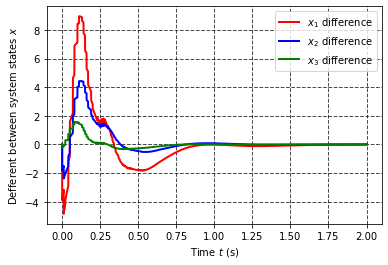

In [ ]:
def control(x, K):
  u = -np.dot(K,x)
  return u

def system_ode(x, t, A, B, K):
    u = control(x,K)
    dx = np.dot(A,x) + np.dot(B,u)
    return dx

dT=0.01
t0 = 0 # Initial time 
tf = 2 # Final time
N = int(2E3) # Numbers of points in time span
# t = np.arange(t0, tf, N) # Create time span
t = np.arange(t0, tf, dT*0.01)

t_disc = np.arange(t0, tf, dT)# Create time span

x0= np.array([1,1,1])

x_d = x0
x_disc = x0

for time in t:
  if (time in t_disc):
    u_d = - np.dot(K,x_d)  
    x_d = np.dot(A_d,x_d) + np.dot(B_d,u_d)
  x_disc = np.vstack((x_disc, x_d))

x_disc = x_disc[:-1]
x_sol = odeint(system_ode, x0, t, args=(A, B, K))

plot(t, x_sol[:,0] - x_disc[:,0], 'r', linewidth = 2., label = r'$x_1$ difference')
plot(t, x_sol[:,1]- x_disc[:,1], 'b', linewidth = 2., label = r'$x_2$ difference')
plot(t, x_sol[:,2]- x_disc[:,2], 'g', linewidth = 2., label = r'$x_3$ difference')
legend()
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
ylabel(r'Defferent between system states $x$')
xlabel(r'Time $t$ (s)')
show()

## Subtask 4


Minimal k that makes system stable and eigenvalues real:
1.58
Minimal k that makes eigenvalues real:
-0.6899999999999995


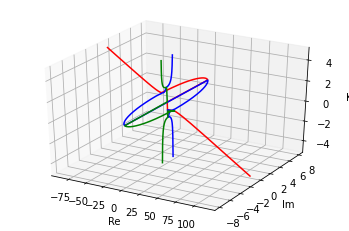

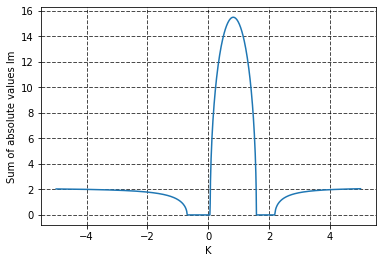

In [ ]:
from traitlets.traitlets import Int
from scipy.integrate import odeint
from scipy.signal import place_poles
import matplotlib.pyplot as plt
import numpy as np
import sympy 

A = np.array([[1, 5, -2],
             [2, 1, -3],
             [-1, -2, 7]])

B = np.array([[2],
              [1],
              [0]])

k_min=-5
k_max=5
k_step=0.01
count = int(np.floor((k_max-k_min)/k_step))
count +=1
k_range = np.linspace(k_min, k_max, count)
E = np.zeros((count, 6))

min_k_s=10000
min_k=10000
sum_im=np.zeros(count)

for i in range(count):
    k = k_range[i]
    K = np.array([[7*k, 6*k, -50*k]])
    ei, v = np.linalg.eig((A - B.dot(K)))
    E[i, 0] = np.real(ei[0])
    E[i, 1] = np.imag(ei[0])
    E[i, 2] = np.real(ei[1])
    E[i, 3] = np.imag(ei[1])
    E[i, 4] = np.real(ei[2])
    E[i, 5] = np.imag(ei[2])
    sum_im[i] = abs(E[i, 1]) + abs(E[i, 3]) + abs(E[i, 5])
    if(E[i, 1]==0.0 and E[i, 3]==0.0 and E[i, 5]==0.0 and np.all(np.linalg.eigvals(A-np.dot(B,K)) < 0)):
        if(k<min_k_s):
            min_k_s=k
    if(E[i, 1]==0.0 and E[i, 3]==0.0 and E[i, 5]==0.0) :
        if(k<min_k):
            min_k=k
        # print(k)

if (min_k_s!=10000):
    print (f"Minimal k that makes system stable and eigenvalues real:\n{min_k_s}")

if (min_k!=10000):
    print (f"Minimal k that makes eigenvalues real:\n{min_k}")

ax = plt.axes(projection='3d')
X = E[:, 0]
Y = E[:, 1]
Z = k_range
ax.plot3D(X,Y,Z,'r')
X = E[:, 2]
Y = E[:, 3]
Z = k_range
ax.plot3D(X,Y,Z,'b')
X = E[:, 4]
Y = E[:, 5]
Z = k_range
ax.plot3D(X,Y,Z,'g')
ax.set_xlabel('Re')
ax.set_ylabel('Im')
ax.set_zlabel('K')
plt.show()

plot(k_range,sum_im)
xlabel('K')
ylabel("Sum of absolute values Im")
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
show()

# Task 3 (3 points)

You are given a system:

$$ 
\begin{cases}
\dot x = 
\begin{bmatrix} 
0 & 1 \\
1 & 10
\end{bmatrix}
x
+ 
\begin{bmatrix} 
0 \\
1
\end{bmatrix}
u \\
u = 
-\begin{bmatrix} 
5k & k
\end{bmatrix} x
\end{cases}
$$

You can chose any positive value of $k$ to design your controller. What is least-norm control gain (control gain is the matrix $\begin{bmatrix} 
5k & k
\end{bmatrix}$) that makes the system not only be stable, but also exhibit no oscillations in the transient process?

Solution:

In order to have a system that would be stable and exhibit with no oscillation, it should satisfy following conditions:
- Real parts of it's eigenvalues should be negative
- Imaginary parts of such system should be equal to 0

Moreover, in ordrer to find least norm control gain, since it is gain as 
$u=-\begin{bmatrix} 5k & k \end{bmatrix}$, we should find such $k$ that would be as close to 0 as posible.

Now, lets check our system after applying control low:
$$
\dot x = \begin{bmatrix} 0 & 1 \\ 1 & 10 \end{bmatrix} + 
\begin{bmatrix} 0  \\ 1 \end{bmatrix}\begin{bmatrix} -5k  & k \end{bmatrix}x =
\begin{bmatrix} 0 & 1 \\ 1-5k & 10-k \end{bmatrix}x
$$
Let's call matrix $\begin{bmatrix} 0 & 1 \\ 1-5k & 10-k \end{bmatrix}$ as $A_c$.

Now, let's find eigenvalues of matrix $A_c$:
$$
A_c-λI = \begin{bmatrix} -λ & 1 \\ 1-5k & 10-k-λ \end{bmatrix} \\
det(A_c-λI) = λ^2+(k-10)λ+5k-1=0 \\
λ_{1,2} = \frac{10-k \pm \sqrt{k^2-40k+104} }{2}
$$

Now, because of our conditions we sould have the following system:
$$
\begin{cases}
k^2-40k+104 \geq 0 \\
10-k \pm \sqrt{k^2-40k+104} < 0
\end{cases} ⇔ 
k \geq 20+\sqrt{296} 
$$
Since we are looking for the value of $k$ closest to 0:
$$ k=20+\sqrt{296} $$

Eigen values after control:
[-13.60232527+1.56466317e-07j -13.60232527-1.56466317e-07j]


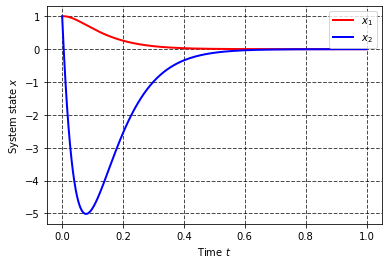

In [ ]:
from matplotlib.pyplot import *
from scipy.integrate import odeint
from scipy.signal import place_poles
import numpy as np
from math import sqrt

def control(x, K):
  u = -np.dot(K,x)
  return u

def system_ode(x, t, A, B, K):
    u = control(x,K)
    dx = np.dot(A,x) + np.dot(B,u)
    return dx

t0 = 0 # Initial time 
tf = 1 # Final time
N = int(2E3) # Numbers of points in time span
t = np.linspace(t0, tf, N) # Create time span
x0= np.array([1,1])

A = np.array([[0, 1],
              [1, 10]])
B = np.array([[0],
              [1]])

K=np.array([[ 5*(20+sqrt(296)),  20+sqrt(296) ]])

Lambda, Q = np.linalg.eig(A-np.dot(B, K))
print(f"Eigen values after control:\n{Lambda}")
x_sol = odeint(system_ode, x0, t, args=(A, B, K))

plot(t, x_sol[:,0], 'r', linewidth = 2., label = r'$x_1$')
plot(t, x_sol[:,1], 'b', linewidth = 2., label = r'$x_2$')
# plot(t, x_sol[:,2], 'g', linewidth = 2., label = r'$x_3$')
# plot(t, x_sol[:,3], 'y', linewidth = 2., label = r'$x_4$')
legend()
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
ylabel(r'System state $x$')
xlabel(r'Time $t$')
show()

As we can see, system is stable and exhibit with no oscillations.

Moreover the real part of the eigenvalues is negative. Speaking of the imaginary part, it is actually 0, but since python has some accuracy problems when calculating boundary values, we can see a negligible value in the output.